<a href="https://colab.research.google.com/github/RaviSahu1520/Prodigy_Task_4/blob/main/Prodigy_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [43]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [44]:
#Loading the Dataset
df = pd.read_csv(r"twitter_training.csv", header=None, names=['ID', 'Game', 'Sentiment', 'Text'])

In [45]:
df.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [46]:
df.tail()

,ID,Game,Sentiment,Text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [47]:
df.sample(5)

,ID,Game,Sentiment,Text
45440,11801,Verizon,Positive,"Today I'm back at Verizon, I now have OANN and..."
47111,5682,HomeDepot,Neutral,I sneezed in the Home delivery line and everyo...
12546,8556,NBA2K,Negative,@Ronnie2K @NBA2K it's the 3rd day playing 2k a...
4244,1931,CallOfDutyBlackopsColdWar,Positive,Soooo Cold War beta tonight on xbox. I enjoyed...
52432,10606,RedDeadRedemption(RDR),Negative,When I just got finished Red Dead Redemption 2...


In [48]:
df.shape

(74682, 4)

In [49]:
df.columns

Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Game       74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [51]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


# **Data Preprocessing**

In [52]:
df.isnull().sum()

,0
ID,0
Game,0
Sentiment,0
Text,686


In [53]:
df.duplicated().sum()

2700

In [54]:
# Remove missing values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [55]:
df.isnull().sum()

,0
ID,0
Game,0
Sentiment,0
Text,0


In [56]:
df.duplicated().sum()

0

# **Data Visualization**

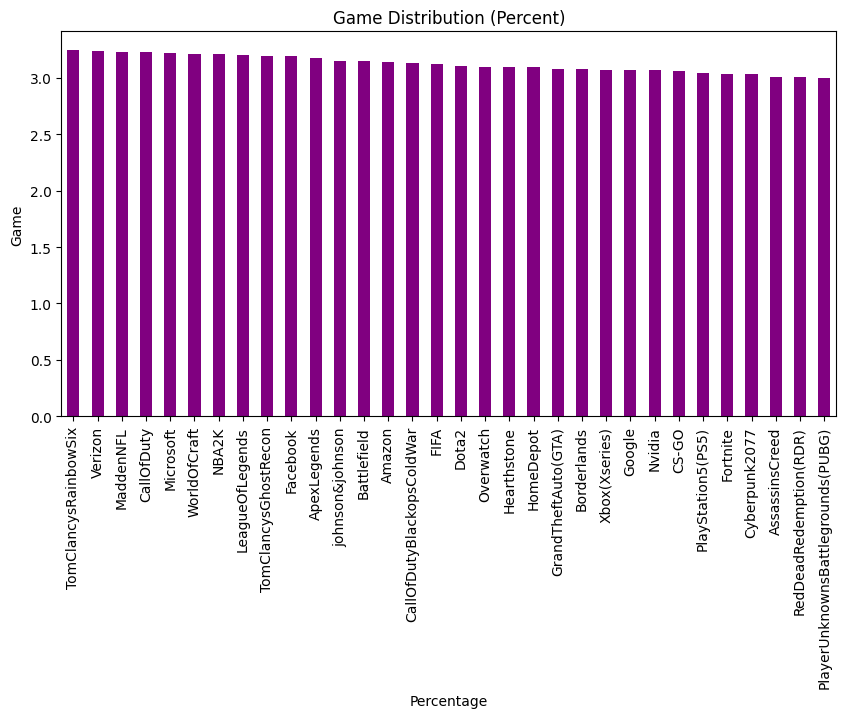

In [57]:
# Calculate the counts for each game
game_counts = df['Game'].value_counts()

# Calculate the percentage for each game
game_percent = (game_counts / len(df)) * 100

# Create the horizontal bar plot
plt.figure(figsize=(10, 5))
game_percent.plot(kind='bar', color='purple')

plt.title('Game Distribution (Percent)')
plt.xlabel('Percentage')
plt.ylabel('Game')
plt.show()

# **Sentiment Analysis**

In [58]:
df['Sentiment'].count()

71656

<ipython-input-59-2ff6ad448710>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=df,palette='viridis')


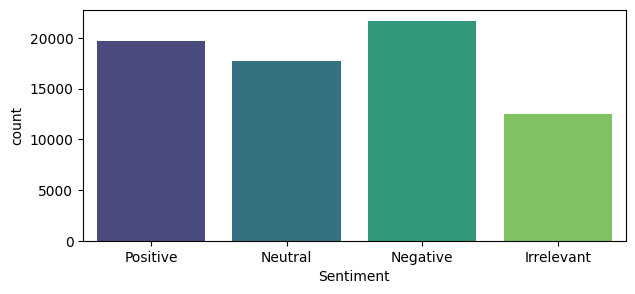

In [59]:
# Visualize sentiment distribution
plt.figure(figsize = (7,3))
sns.countplot(x = 'Sentiment',data=df,palette='viridis')
plt.show()

In [60]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Print the counts
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


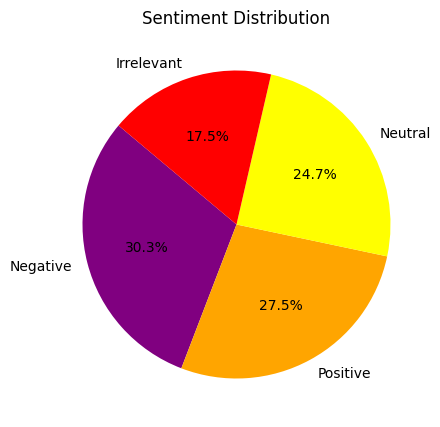

In [61]:
# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['purple', 'orange','yellow', 'red'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()


# Sentiment Distribution in Google

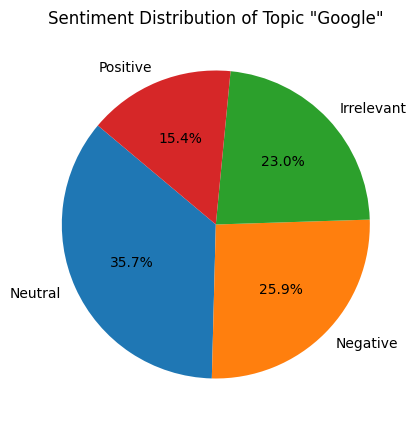

In [63]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = df[df['Game'] == 'Google']


# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

# **Sentiment Distribution in Microsoft**

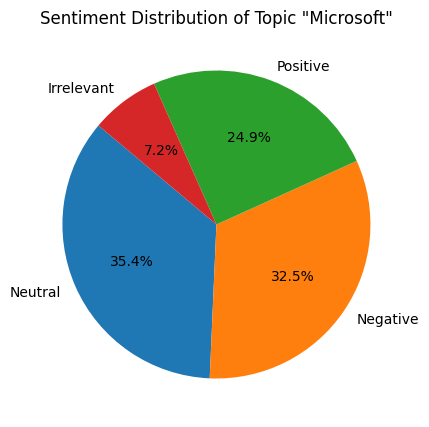

In [65]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
microsoft_data = df[df['Game'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = microsoft_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

# **Sentiment Distribution in FIFA**

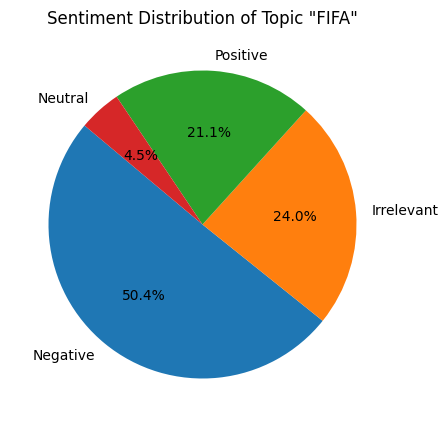

In [67]:
# Filter the dataset to include only entries related to the topic 'FIFA'
fifa_data = df[df['Game'] == 'FIFA']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = fifa_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "FIFA"')
plt.show()

In [68]:
df['msg_len'] = df['Text'].apply(len)

In [69]:
df.head()

,ID,Game,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57


# **Plot of message length distribution in data**

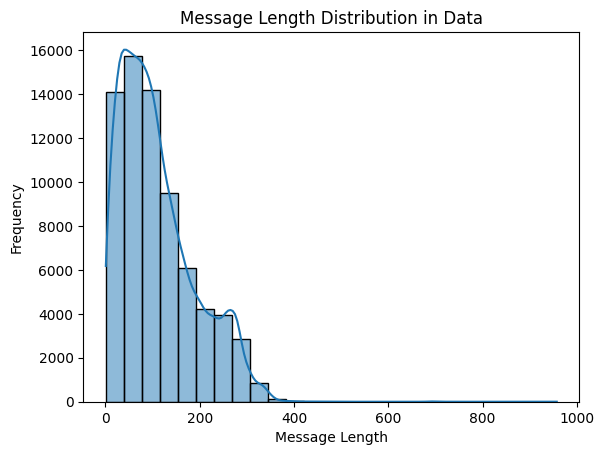

In [70]:
sns.histplot(df['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

<ipython-input-71-4a38ec8f94eb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['Sentiment'], y='msg_len',


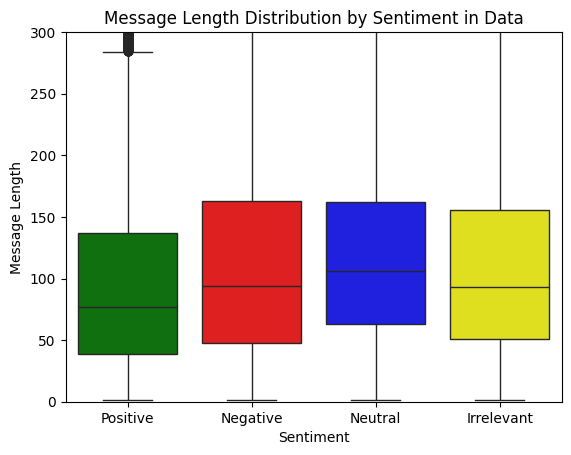

In [71]:
sns.boxplot(data=df, x=df['Sentiment'], y='msg_len',
            palette=['green', 'red', 'blue', 'yellow'],
            order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])

plt.title('Message Length Distribution by Sentiment in Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()

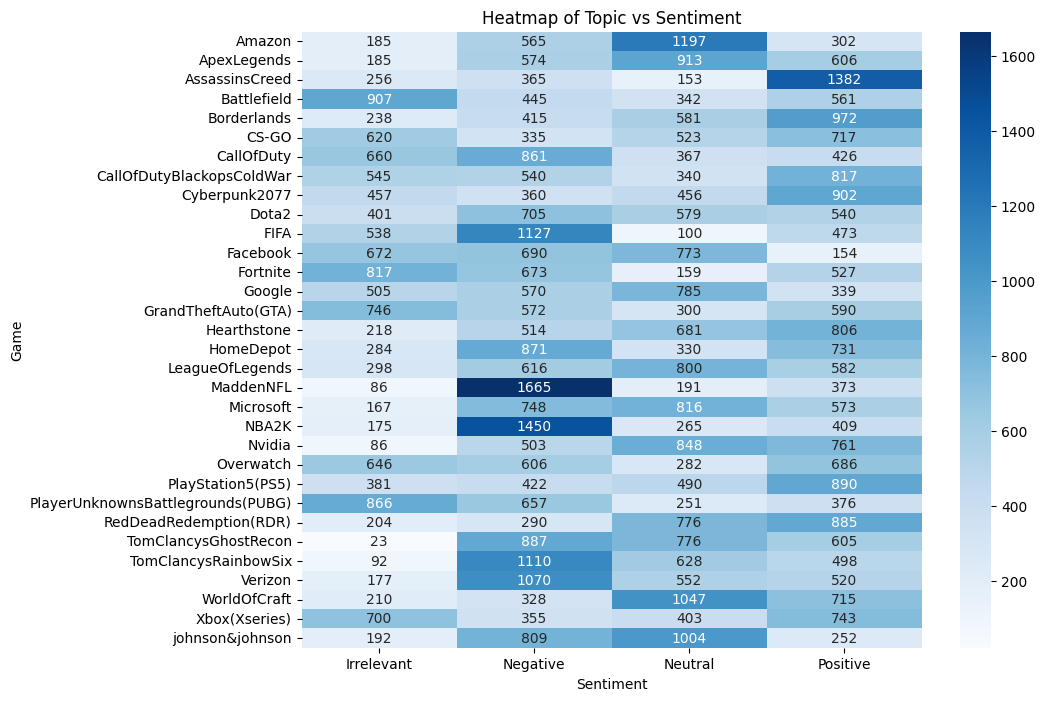

In [72]:
# Create a crosstab of the data
crosstab = pd.crosstab(df['Game'], df['Sentiment'])

# Create a heatmap of the crosstab
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Game')
plt.show()